In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
images=digits.images
print(images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Image sample

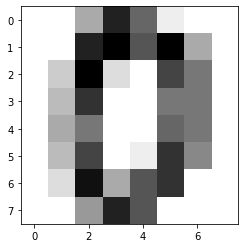

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[0],cmap='binary',interpolation='nearest')

In [4]:
targets=digits.target
print(targets[0]) # print target id

0


reshape all the images for model training

In [5]:
images=images.reshape(1797,8*8)

Split for training

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2)

# Random forest xgboost test one

In [7]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder = False,eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [8]:
y_pred=model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.83%


In [10]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[41  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  1  0  0  1  0]
 [ 0  0  0  0 26  0  0  0  0  0]
 [ 2  0  0  0  0 38  0  0  0  3]
 [ 1  0  0  0  0  1 27  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 1  3  0  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  1  0  0  0 34]]


# Random forest xgboost test two

In [11]:
import xgboost as xg
model = xg.XGBRFClassifier(n_estimators=100, use_label_encoder=False, subsample=0.9, colsample_bynode=0.2)

ABOVE PARAMETERS WERE CHANGED TO FIND A BETTER ACCURACY

In [12]:
model.fit(X_train,y_train, eval_metric='logloss')

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=0.2, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=12,
                num_parallel_tree=100, objective='multi:softprob',
                random_state=0, reg_alpha=0, scale_pos_weight=None,
                subsample=0.9, tree_method='exact', use_label_encoder=False,
                validate_parameters=1, verbosity=None)

In [13]:
y_pred=model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.11%
